# Bike Booking Prediction

In [1]:
import numpy as np
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/rohithsukka/DataSets/main/Daily%20Bike%20Sharing.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
df1 = df.drop('instant' , axis='columns')
df1.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df1.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
print(df1['season'].unique())
print(df1['yr'].unique())
print(df1['mnth'].unique())
print(df1['holiday'].unique())
print(df1['weekday'].unique())
print(df1['workingday'].unique())
print(df1['weathersit'].unique())

[1 2 3 4]
[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[0 1]
[6 0 1 2 3 4 5]
[0 1]
[2 1 3]


In [5]:
print(df1['dteday'].min())
print(df1['dteday'].max())

2011-01-01
2012-12-31


In [6]:
df1['dteday'] = pd.to_datetime(df1['dteday'] , format = '%Y-%m-%d')

In [7]:
print(df1['dteday'].min())
print(df1['dteday'].max())

2011-01-01 00:00:00
2012-12-31 00:00:00


In [8]:
dates = df1['dteday'].dt.day

In [9]:
df1.insert(1,"date",dates)

In [10]:
df1.head()

,dteday,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
#Drop date column 

df2 = df1.drop(['dteday' , 'yr'] , axis= 'columns')
df2.head()

,date,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
df2.isna().sum()

date          0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df2.corr()

,date,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
date,1.000000,-0.000861,0.009157,-0.010710,-0.000428,0.009907,-0.023824,0.024253,0.018286,0.042753,0.021588,-0.013365,-0.024171,-0.024204
season,-0.000861,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
mnth,0.009157,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010710,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000428,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.009907,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.023824,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.024253,0.334315,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.018286,0.342876,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.042753,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


In [14]:
df3 = df2.drop(['casual','registered'], axis='columns')
df3.head()

,date,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


<Axes: >

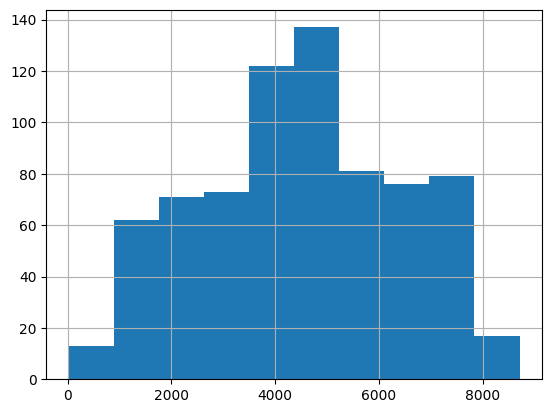

In [15]:
df3['cnt'].hist()

In [16]:
X = df3.drop('cnt',axis='columns')     #features
Y = df3['cnt']                         #labels

In [17]:
#split the data i.e. X and Y into train and test

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.85)

In [18]:
#train the model 

#import library to train 

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [19]:
#Fit x and y to train 

model1.fit(xtrain,ytrain)

LinearRegression()

In [20]:
print(model1.coef_)

[   -6.23347811   528.52645171   -35.65198026  -316.26506203
    57.69125609   173.21881537  -482.22092827  2976.12363927
  2770.05236517 -2206.59613353 -3300.8767727 ]


In [21]:
print(model1.intercept_)

3118.429755327117


In [22]:
#evaluate 

ytrainPred = model1.predict(xtrain)

ytestPred = model1.predict(xtest)


maetrain = (abs(ytrain - ytrainPred)).mean()
print(maetrain)

maetest = (abs(ytest - ytestPred)).mean()
print(maetest)

1108.6599922371704
1222.9300996425584


* R-Squared value => for a good model r_squared value will be close to 1 and for poor model it will be close to 0.

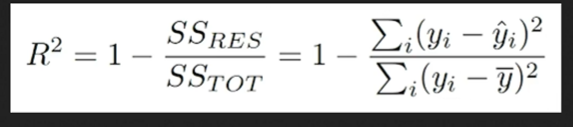

In [23]:
from sklearn.metrics import r2_score

r2_train = r2_score(ytrain,ytrainPred)
print("R2_train" , r2_train)

print()

r2_test = r2_score(ytest,ytestPred)
print("R2_test" , r2_test)

R2_train 0.538836608874327

R2_test 0.4647918816199399


**Data Normalization**

In [24]:
n1 = np.array([[4,8,3,2,1,7,6]]).reshape(-1,1)
print(n1)

[[4]
 [8]
 [3]
 [2]
 [1]
 [7]
 [6]]


In [25]:
(n1 - n1.min()) / (n1.max() - n1.min())

array([[0.42857143],
       [1.        ],
       [0.28571429],
       [0.14285714],
       [0.        ],
       [0.85714286],
       [0.71428571]])

In [26]:
from sklearn.preprocessing import MinMaxScaler
scl_demo = MinMaxScaler()

scl_demo.fit_transform(n1)

array([[0.42857143],
       [1.        ],
       [0.28571429],
       [0.14285714],
       [0.        ],
       [0.85714286],
       [0.71428571]])

In [27]:
#split the data i.e. X and Y into train and test

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.85)

#Data Scaling and Normalization  
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(xtrain)

xtrainScale = scaler.transform(xtrain)
xtestScale = scaler.transform(xtest)

In [28]:
#train 
 

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

model2.fit(xtrainScale,ytrain)

#evaluate
ytrainPred = model2.predict(xtrainScale)
ytestPred = model2.predict(xtestScale)

from sklearn.metrics import r2_score

r2_train = r2_score(ytrain,ytrainPred)
print("R2_train" , r2_train)

print()

r2_test = r2_score(ytest,ytestPred)
print("R2_test" , r2_test)

R2_train 0.535850905792755

R2_test 0.4760860281947735


* **use only those features with corelation value lesser then -0.2 or more than 0.2**
* **Try using Non-Linear Regression - feature interaction, 2-degree or 3-degree non-linear regression**

In [29]:
df3.corr()

,date,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
date,1.000000,-0.000861,0.009157,-0.010710,-0.000428,0.009907,-0.023824,0.024253,0.018286,0.042753,0.021588,-0.024204
season,-0.000861,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100
mnth,0.009157,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.279977
holiday,-0.010710,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.068348
weekday,-0.000428,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443
workingday,0.009907,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.061156
weathersit,-0.023824,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391
temp,0.024253,0.334315,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.018286,0.342876,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.042753,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659


In [30]:
X = df3[['season','temp','atemp']]
Y = df3['cnt']

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)

#Data Scaling and Normalization  
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(xtrain)

xtrainScale = scaler.transform(xtrain)
xtestScale = scaler.transform(xtest)

In [63]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2, include_bias=False)

pol.fit(xtrainScale)

xtrainPol = pol.transform(xtrainScale)
xtestPol = pol.transform(xtestScale)

In [64]:
print(xtrain.shape)
print(xtrainPol.shape)

(548, 3)
(548, 9)


In [65]:
#Train the model using xtrainPOl & ytrian

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(xtrainPol,ytrain)

print(model2.coef_)
#Evaluate model performance 

ytrainPred = model2.predict(xtrainPol)
ytestPred = model2.predict(xtestPol)

[  2079.07395814   9461.57290079   3393.36934544   -511.56846975
 -13344.97301348  12339.60086071  11628.61487948 -28299.91874233
   9505.55090139]


In [67]:
#Evaluate performance 

print("Train mean absolute error" , abs(ytrain - ytrainPred).mean())
print("Test mean absolute error" , abs(ytest - ytestPred).mean())

Train mean absolute error 1190.057725027853
Test mean absolute error 1110.9686332553488


In [68]:
from sklearn.metrics import r2_score

r2_train = r2_score(ytrain,ytrainPred)
print("R2_train" , r2_train)

print()

r2_test = r2_score(ytest,ytestPred)
print("R2_test" , r2_test)

R2_train 0.4721499612148703

R2_test 0.5219199300961265
